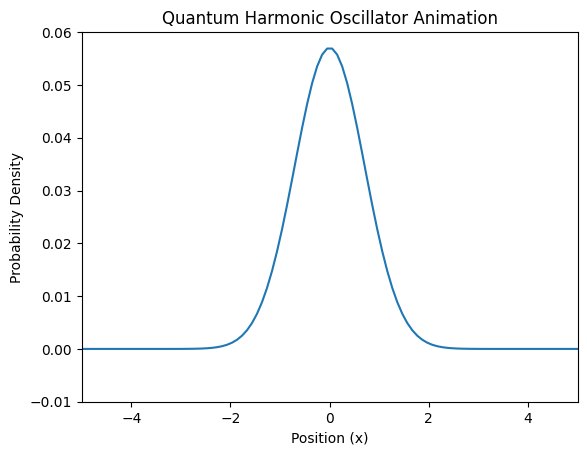

In [1]:
# An illustration of the wave function using the quantum Schrodinger equation
# Developed by: Dr. Michael P. Haydock - IBM Fellow Emeritus - Data & Optimization Sciences, Inc.
# Initial Coding 2/11/2025

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters for the quantum harmonic oscillator
mass = 1.0
omega = 1.0
hbar = 1.0

# Define the grid for position space
N = 100
xmax = 5.0
x = np.linspace(-xmax, xmax, N)
dx = x[1] - x[0]

# Define the potential energy for the harmonic oscillator
V = 0.5 * mass * omega**2 * x**2

# Define the Hamiltonian matrix
H = -0.5 * (np.diag(np.ones(N-1), -1) - 2 * np.diag(np.ones(N), 0) + np.diag(np.ones(N-1), 1)) / dx**2 + np.diag(V)

# Diagonalize the Hamiltonian to get energy eigenvalues and eigenstates
energies, states = np.linalg.eigh(H)

# Initial wave function (ground state)
psi0 = states[:, 0]

# Time evolution parameters
dt = 0.01
T = 2.0
num_steps = int(T / dt)

# Initialize the wave function array
psi = np.zeros((num_steps, N), dtype=complex)
psi[0] = psi0

# Time evolution operator
U = np.exp(-1j * energies * dt / hbar)

# Time evolution
for n in range(1, num_steps):
    psi[n] = np.dot(U, psi[n-1])

# Create a figure and axis for the animation
fig, ax = plt.subplots()
line, = ax.plot(x, np.abs(psi[0])**2)

# Function to update the frame
def update(frame):
    y = np.abs(psi[frame])**2
    line.set_ydata(y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_steps, blit=True, interval=20)

# Set plot parameters
ax.set_ylim(-0.01, 0.06)
ax.set_xlim(-xmax, xmax)
ax.set_xlabel('Position (x)')
ax.set_ylabel('Probability Density')
ax.set_title('Quantum Harmonic Oscillator Animation')

# Display the animation
plt.show()
